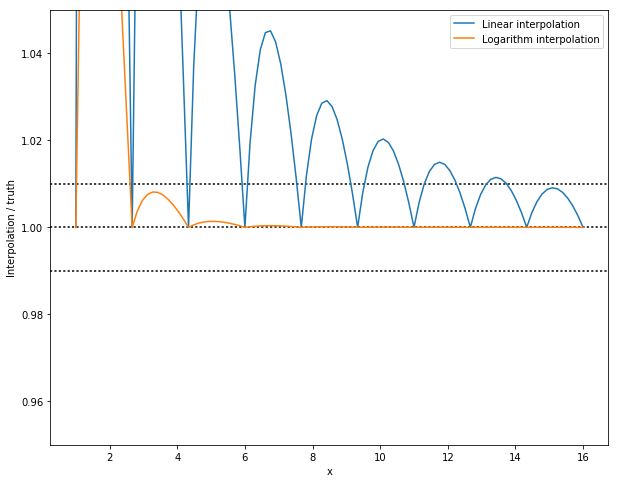

In [5]:
#Log interpolation
import numpy as np
import matplotlib.pyplot as plt
import meadlib as mead
import scipy.interpolate as interpolate

#Range to test interpolation over
xmin=1
xmax=16
nx_tab=10
nx_test=100

#Function to be interpolated
def f(x):
    return x**0.5+x**3

#Make tabulated x, y
x_tab=np.linspace(xmin,xmax,nx_tab)
y_tab=f(x_tab)
#print(x_tab,y_tab)

#Create linear and log interpolation functions
log_interpolation=mead.log_interp1d(x_tab,y_tab)
lin_interpolation=interpolate.interp1d(x_tab,y_tab)

#Set x range for test
x=np.linspace(xmin,xmax,nx_test)

#Make the plot
#plt.plot(x,f(x),label='Original function')
plt.figure(1,figsize=(10,8))
plt.axhline(1.01,color='k',linestyle=':')
plt.axhline(1.00,color='k',linestyle=':')
plt.axhline(0.99,color='k',linestyle=':')
plt.plot(x,lin_interpolation(x)/f(x),label='Linear interpolation')
plt.plot(x,log_interpolation(x)/f(x),label='Logarithm interpolation')
plt.xlabel('x')
plt.ylabel('Interpolation / truth')
plt.ylim(0.95,1.05)
plt.legend()
plt.show()

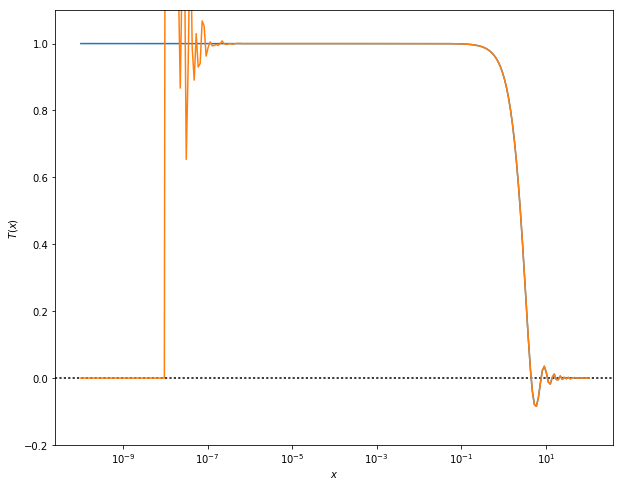

In [2]:
#Top hat special function
import numpy as np
import matplotlib.pyplot as plt
import meadlib as mead

#A 'stupid' version of the function that does not take into account cancellation at small x
def Tophat_stupid(x):
    return 3.*(np.sin(x)-x*np.cos(x))/x**3

#Set xrange for test
xmin=1e-10
xmax=1e2
nx=256
#x=np.exp(np.linspace(np.log(xmin),np.log(xmax),nx))
x=mead.logspace(xmin,xmax,nx)

#Plot T(k) and the stupid T(k)
plt.figure(1,figsize=(10,8))
plt.axhline(0.,c='k',ls=':')
plt.semilogx(x,mead.Tophat(x),label='Correct T(x)')
plt.semilogx(x,Tophat_stupid(x),label='Stupid T(x)')
plt.xlabel(r'$x$')
plt.ylabel(r'$T(x)$')
plt.ylim((-0.2,1.1))
plt.show()

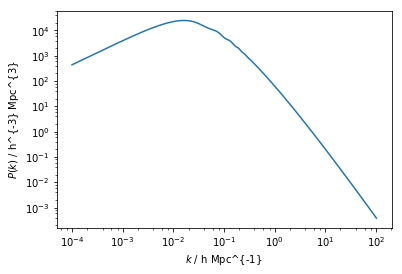

R: 8.0
Sigma(R): 0.8001263418030715
Error: 5.322591929080023e-05



/usr/local/lib/python3.6/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)


In [3]:
#Integration in log space and reading CAMB
import numpy as np
import meadlib as mead
from scipy import integrate
import matplotlib.pyplot as plt
import cosmology as cosm

#Import P(k) and plot
k_tab,Pk_tab=cosm.read_CAMB('data/CAMB_matterpower_z0.dat')
plt.loglog(k_tab,Pk_tab)
plt.xlabel(r'$k$ / h Mpc^{-1}')
plt.ylabel(r'$P(k)$ / h^{-3} Mpc^{3}')
plt.show()

#Create an interpolation function from P(k)
Pk=mead.log_interp1d(k_tab,Pk_tab,fill_value='extrapolate')

#Standard integrand
def sigma_integrand(k,R):
    return (4.*np.pi/(2.*np.pi)**3)*Pk(k)*(k**3)*(mead.Tophat(k*R)**2)/k
    #return (4.*np.pi/(2.*np.pi)**3)*Pk(k)*k**2

#Logarithmic integrand (differs from above by one factor of k only)
def sigma_integrand_log(k,R):
    k=np.exp(k)
    return (4.*np.pi/(2.*np.pi)**3)*Pk(k)*(k**3)*(mead.Tophat(k*R)**2)
    #return (4.*np.pi/(2.*np.pi)**3)*Pk(k)*(k**3)

#Function to calculate the integral
def sigma(R):
    kmin=1e-3
    kmax=1e2
    sigma_squared,error=integrate.quad(sigma_integrand, kmin, kmax, args=(R,), limit=50)
    #sig2,_=integrate.quad(sigma_integrand_log, np.log(kmin), np.log(kmax), args=(R,), limit=50)
    #sigma_squared,error=mead.integrate_quad_log(sigma_integrand, kmin, kmax, args=(R,), limit=50)
    return np.sqrt(sigma_squared),error

#Set the range in 'r' to plot
rmin=1e-2
rmax=10
nr=100
R=mead.logspace(rmin,rmax,nr)
R=8.
sigma,_=sigma(R)
print('R:', R)
print('Sigma(R):', sigma)
print('Error:', _)
print()

In [4]:
#Logarithmic array spacing
import numpy as np
import meadlib as mead

log10=np.log10

x1=1e-1
x2=1e3
nx=11

#Numpy version, weird that you need to specify log10
x=np.logspace(np.log10(x1),np.log10(x2),nx)
print('Numpy version:', x)
print()

#My version
x=mead.logspace(x1,x2,nx)
print('My version:', x)
print()

Numpy version: [1.00000000e-01 2.51188643e-01 6.30957344e-01 1.58489319e+00
 3.98107171e+00 1.00000000e+01 2.51188643e+01 6.30957344e+01
 1.58489319e+02 3.98107171e+02 1.00000000e+03]

My version: [1.00000000e-01 2.51188643e-01 6.30957344e-01 1.58489319e+00
 3.98107171e+00 1.00000000e+01 2.51188643e+01 6.30957344e+01
 1.58489319e+02 3.98107171e+02 1.00000000e+03]

